In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras 
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout 
import os

In [2]:
path1=r"D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train"

In [3]:
directory_contents = os.listdir(path1)
print(directory_contents)

['Mask', 'Non Mask']


In [4]:
cate=['Mask', 'Non Mask']

In [5]:
for i in cate:
    folders=os.path.join(path1,i)
    print(folders)

D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Non Mask


In [6]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        print(image_path)
        
## image we are able to access

D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0003.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0006.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0018.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0019.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0022.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0027.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0029.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0037.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0040.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0042.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New 

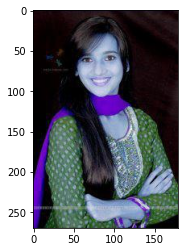

In [7]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)  # using the cv2 i am reading the image and storing in variable image_array
        plt.imshow(image_array)
        break

# Code for explanation that images have been accessed

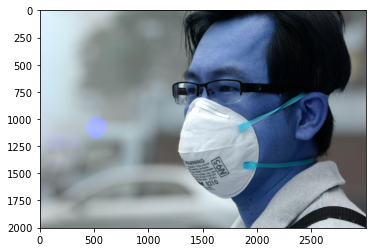

In [8]:
## TO access the 1st image 
abcd=cv2.imread(r"D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0003.jpg")
abcd

abcd=np.array(abcd)
abcd

type(abcd)

plt.imshow(abcd)

In [9]:
### Till this point we have x but not y


In [10]:
image_size =200
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)  # we need to tell software which image is of cat which is of dog
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path) 
        image_array=cv2.resize(image_array,(image_size,image_size))# Resizing Each image to
        #print(image_path)
        input_image.append([image_array,label])

In [11]:
len(input_image)

600

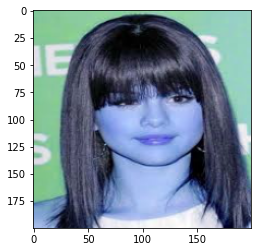

In [12]:
# This code with pick the random picture for X and Y values
np.random.shuffle(input_image)
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

plt.imshow(X[0])

In [13]:
X=np.array(X)
Y=np.array(Y)

X=X/255   # bcz the pixel max size we take 255

model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [14]:
model1=model.fit(X,Y,epochs=10)
model1

Epoch 1/10
19/19 [==============================] - 25s 1s/step - loss: 12.4297
Epoch 2/10
19/19 [==============================] - 24s 1s/step - loss: 0.3811
Epoch 3/10
19/19 [==============================] - 24s 1s/step - loss: 0.2168
Epoch 4/10
19/19 [==============================] - 25s 1s/step - loss: 0.1167
Epoch 5/10
19/19 [==============================] - 25s 1s/step - loss: 0.0652
Epoch 6/10
19/19 [==============================] - 26s 1s/step - loss: 0.0355
Epoch 7/10
19/19 [==============================] - 25s 1s/step - loss: 0.0341
Epoch 8/10
19/19 [==============================] - 26s 1s/step - loss: 0.0178
Epoch 9/10
19/19 [==============================] - 26s 1s/step - loss: 0.0128
Epoch 10/10
19/19 [==============================] - 27s 1s/step - loss: 0.0141


In [15]:
model1.history

{'loss': [12.429743766784668,
  0.38107600808143616,
  0.21683049201965332,
  0.11672201752662659,
  0.06520485877990723,
  0.035526540130376816,
  0.03411370515823364,
  0.01783466711640358,
  0.012836853973567486,
  0.014087598770856857]}

In [16]:
Model1=pd.DataFrame(model1.history)
Model1

,loss
0,12.429744
1,0.381076
2,0.216830
3,0.116722
4,0.065205
5,0.035527
6,0.034114
7,0.017835
8,0.012837
9,0.014088


In [17]:
from sklearn.metrics import confusion_matrix,confusion_matrix,accuracy_score

In [18]:
pred_=model.predict(X)
class_1=np.argmax(pred_,axis=1)

pred_

array([[1.0023621e-05, 9.9998999e-01],
       [2.9432629e-05, 9.9997056e-01],
       [9.9999940e-01, 6.5123652e-07],
       ...,
       [9.9847454e-01, 1.5255061e-03],
       [7.2598183e-08, 9.9999988e-01],
       [4.3231786e-08, 1.0000000e+00]], dtype=float32)

In [19]:
tab1=confusion_matrix(class_1, Y)

tab1

array([[300,   0],
       [  0, 300]], dtype=int64)

In [20]:
tab1.diagonal().sum()/tab1.sum()  # Accuracy  

1.0

### Save the Model

In [21]:
pwd

'C:\\Users\\sasai\\jupyter notebook\\Python'

In [22]:
model.save("my_mask_&_no_mask_mode.h5") # model is saved at the path shown in pwd with the name in ""

### load the model

In [25]:
from keras.models import load_model
model =load_model("my_mask_&_no_mask_mode.h5") 

In [ ]:
# and now use it for prediction
#model.predict()

### Load the Test file

In [26]:
path2=r"D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Test"

In [27]:
directory_contents = os.listdir(path1)
print(directory_contents)

['Mask', 'Non Mask']


In [28]:
cate1=['Mask', 'Non Mask']

In [29]:
image_size =200
input_image=[]
for i in cate1:
    folders=os.path.join(path1,i)
    label=cate1.index(i)  # we need to tell software which image is of cat which is of dog
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path) 
        image_array=cv2.resize(image_array,(image_size,image_size))# Resizing Each image to
        #print(image_path)
        input_image.append([image_array,label])

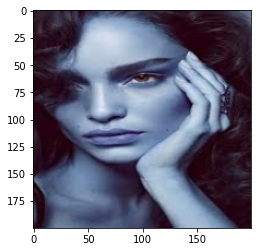

In [32]:
# This code with pick the random picture for X and Y values
np.random.shuffle(input_image)
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

plt.imshow(X[0])

In [34]:
X=np.array(X)
Y=np.array(Y)

X=X/255   # bcz the pixel max size we take 255

model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [36]:
pred_=model.predict(X)
class_1=np.argmax(pred_,axis=1)

pred_

array([[0.48449546, 0.5155046 ],
       [0.51449406, 0.48550588],
       [0.5428762 , 0.45712382],
       ...,
       [0.5100182 , 0.48998186],
       [0.52511674, 0.47488317],
       [0.5183689 , 0.48163116]], dtype=float32)

In [37]:
tab1=confusion_matrix(class_1, Y)

tab1

array([[267, 287],
       [ 33,  13]], dtype=int64)

In [38]:
tab1.diagonal().sum()/tab1.sum()  # Accuracy  

0.4666666666666667